In [1]:
import pandas as pd

In [58]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [296]:
df = pd.read_pickle('../data/pkl/ADV_OHE_TEAM_ALL')
columns_drop = ['GAME_ID', 'TEAM_ID_h', 'TEAM_ABBREVIATION_h', 'TEAM_ID_a','TEAM_NAME_a','TEAM_ABBREVIATION_a', 'HOME_TEAM_h', 'HOME_TEAM_a', 'OFF_RATING_h',
 'DEF_RATING_h',
 'NET_RATING_h',
 'AST_PCT_h',
 'AST_TOV_h',
 'OREB_PCT_h',
 'DREB_PCT_h',
 'REB_PCT_h',
 'TM_TOV_PCT_h',
 'EFG_PCT_h',
 'TS_PCT_h',
 'PACE_h',
 'POSS_h','OFF_RATING_a',
 'DEF_RATING_a',
 'NET_RATING_a',
 'AST_PCT_a',
 'AST_TOV_a',
 'OREB_PCT_a',
 'DREB_PCT_a',
 'REB_PCT_a',
 'TM_TOV_PCT_a',
 'EFG_PCT_a',
 'TS_PCT_a',
 'PACE_a',
 'POSS_a']
df = df.drop(columns_drop, axis=1)

In [297]:
#target = df['PLUS_MINUS']
train_test_split_date = '2022-04-27 00:00:00'
X_train = df.loc[df.GAME_DATE < train_test_split_date, ~df.columns.isin(['PLUS_MINUS'])]
X_test = df.loc[df.GAME_DATE > train_test_split_date, ~df.columns.isin(['PLUS_MINUS'])]
y_train = df.loc[df.GAME_DATE < train_test_split_date, ['PLUS_MINUS']]['PLUS_MINUS']
y_test = df.loc[df.GAME_DATE > train_test_split_date, ['PLUS_MINUS']]['PLUS_MINUS']

In [298]:
X_train.drop(['TEAM_NAME_h','GAME_DATE'], axis=1, inplace=True)
X_test.drop(['TEAM_NAME_h', 'GAME_DATE'], axis=1, inplace=True)

In [299]:
importances_removed = ['POSS_Roll_median_h', 'OFF_RATING_Roll_std_a', 'PACE_Roll_mean_a', 'REB_PCT_Roll_std_h', 'AST_PCT_Roll_std_a', 'AST_TOV_Roll_mean_h', 'EFG_PCT_Roll_mean_a', 'OFF_RATING_Roll_median_a', 'TS_PCT_Roll_std_a', 'REB_PCT_Roll_mean_a', 'OFF_RATING_Roll_std_h', 'OFF_RATING_Roll_mean_a', 'OREB_PCT_Roll_mean_a', 'REB_PCT_Roll_median_a', 'TM_TOV_PCT_Roll_std_h', 'OREB_PCT_Roll_median_h', 'TS_PCT_Roll_std_h', 'EFG_PCT_Roll_std_h', 'DREB_PCT_Roll_std_h', 'AST_PCT_Roll_median_h', 'DEF_RATING_Roll_std_h', 'AST_PCT_Roll_mean_a', 'TM_TOV_PCT_Roll_mean_h', 'OREB_PCT_Roll_median_a', 'AST_TOV_Roll_median_h', 'POSS_Roll_median_a', 'DEF_RATING_Roll_median_h', 'DREB_PCT_Roll_median_h', 'EFG_PCT_Roll_std_a', 'PACE_Roll_median_a', 'DREB_PCT_Roll_mean_h', 'POSS_Roll_mean_h', 'TM_TOV_PCT_Roll_median_a', 'TM_TOV_PCT_Roll_median_h', 'PACE_Roll_median_h', 'DREB_PCT_Roll_mean_a', 'POSS_Roll_mean_a', 'TS_PCT_Roll_median_h', 'TM_TOV_PCT_Roll_std_a', 'POSS_Roll_std_a', 'DEF_RATING_Roll_median_a', 'EFG_PCT_Roll_median_h', 'OFF_RATING_Roll_median_h', 'EFG_PCT_Roll_median_a', 'TS_PCT_Roll_mean_a', 'OREB_PCT_Roll_std_h', 'NET_RATING_Roll_std_a', 'POSS_Roll_std_h', 'AST_PCT_Roll_mean_h', 'PACE_Roll_mean_h', 'OREB_PCT_Roll_std_a', 'DREB_PCT_Roll_std_a', 'REB_PCT_Roll_std_a', 'PACE_Roll_std_a', 'AST_PCT_Roll_median_a', 'REB_PCT_Roll_mean_h', 'REB_PCT_Roll_median_h']
X_train_fs = X_train.drop(importances_removed, axis=1)
X_test_fs = X_test.drop(importances_removed, axis=1)

In [265]:
from ngboost import NGBRegressor
import ngboost
from sklearn.tree import DecisionTreeRegressor
base=DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
ngb = NGBRegressor(col_sample=0.4, minibatch_frac=0.2,
             n_estimators=485, Base=base, learning_rate=0.005)

In [266]:
y_train = y_train.ravel()
y_test = y_test.ravel()
weights_loc = np.argwhere((y_train < -15) | (y_train > 15))
sample_weight = np.array([1] * y_train.shape[0])
sample_weight[weights_loc.ravel()] += 1

In [267]:
for i in range(10):
    print(i)
    ngb.fit(X_train_fs.reset_index(drop=True), y_train, sample_weight=sample_weight)

0
[iter 0] loss=4.3509 val_loss=0.0000 scale=1.0000 norm=12.1829
[iter 100] loss=4.1939 val_loss=0.0000 scale=1.0000 norm=11.1634
[iter 200] loss=4.1566 val_loss=0.0000 scale=1.0000 norm=10.8285
[iter 300] loss=4.1487 val_loss=0.0000 scale=1.0000 norm=10.9900
[iter 400] loss=4.0993 val_loss=0.0000 scale=1.0000 norm=10.4098
1
[iter 0] loss=4.1258 val_loss=0.0000 scale=1.0000 norm=11.0474
[iter 100] loss=4.0546 val_loss=0.0000 scale=1.0000 norm=10.1954
[iter 200] loss=4.0374 val_loss=0.0000 scale=1.0000 norm=10.2013
[iter 300] loss=4.0407 val_loss=0.0000 scale=1.0000 norm=10.2650
[iter 400] loss=4.0306 val_loss=0.0000 scale=1.0000 norm=10.3223
2
[iter 0] loss=4.0111 val_loss=0.0000 scale=1.0000 norm=10.0357
[iter 100] loss=3.9736 val_loss=0.0000 scale=1.0000 norm=9.7229
[iter 200] loss=3.9373 val_loss=0.0000 scale=1.0000 norm=9.6456
[iter 300] loss=3.9265 val_loss=0.0000 scale=1.0000 norm=9.4523
[iter 400] loss=3.9547 val_loss=0.0000 scale=1.0000 norm=9.9110
3
[iter 0] loss=3.9094 val_lo

In [268]:
import seaborn as sns

<Axes: ylabel='Count'>

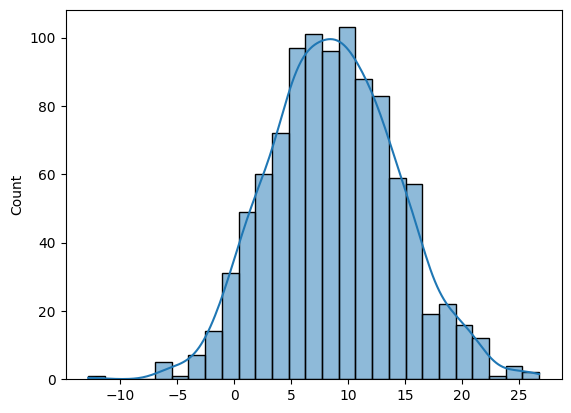

In [269]:
Y_dist = ngb.pred_dist(X_test_fs)
value = np.random.normal(loc=Y_dist.params['loc'][30],scale=Y_dist.params['scale'][30],size=1000)
sns.histplot(value, kde=True)

In [233]:
from scipy.integrate import quad

import matplotlib.pyplot as plt
import scipy.stats

#----------------------------------------------------------------------------------------#
# Normal Distribution

x_min = min(target)
x_max = max(target)

mean = Y_dist.params['loc'][3]
std = Y_dist.params['scale'][3]

x = np.linspace(x_min, x_max, 1000)

y = scipy.stats.norm.pdf(x,mean,std)


def normal_distribution_function(x, mean, std):
    value = scipy.stats.norm.pdf(x,loc=mean,scale=std)
    return value

x1 = 5
x2 = max(target)

quad(normal_distribution_function, x1, x2, args=(mean, std))

(0.3844556885929851, 3.342367315378322e-09)

In [102]:
cum_sum = scipy.stats.norm.cdf(x, mean, std)

In [143]:
betting_metric_left = np.argwhere(np.isclose(cum_sum, 0.54, rtol=1e-02, atol=1e-04))[0][0]
betting_metric_right = np.argwhere(np.isclose(cum_sum, 0.46, rtol=1e-02, atol=1e-04))[0][0]

In [148]:
print(np.round(x[betting_metric_left]))
print(np.round(x[betting_metric_right]))

-1.0
-3.0


In [111]:
quad(normal_distribution_function, min(target), x2)

(0.28399943234020086, 1.6687125236188335e-09)

In [334]:
dist_prob

[(0.7286228833763986, 8.089339002716805e-15)]

In [333]:
dist_prob = [quad(normal_distribution_function, i, max(target))[0] if i>0 else quad(normal_distribution_function, min(target), i)[0] for i in y_test]

TypeError: normal_distribution_function() missing 2 required positional arguments: 'mean' and 'std'

In [87]:
pd.DataFrame({"y_true": y_test, "model_prob":dist_prob})

,y_true,model_prob
0,-7.0,0.338029
1,-14.0,0.159946
2,-8.0,0.308448
3,8.0,0.206618
4,3.0,0.342300
...,...,...
1751,36.0,0.000887
1752,2.0,0.373049
1753,2.0,0.373049
1754,-7.0,0.338029


In [96]:
df_sbr = pd.read_pickle('../data/pkl/sbr_betting_data.pkl')

In [200]:
np.sort(pd.unique(df_sbr['Opponent']))

array(['Atlanta', 'Boston', 'Brooklyn', 'Charlotte', 'Chicago',
       'Cleveland', 'Dallas', 'Denver', 'Detroit', 'Golden State',
       'Houston', 'Indiana', 'L.A. Clippers', 'L.A. Lakers', 'Memphis',
       'Miami', 'Milwaukee', 'Minnesota', 'New Orleans', 'New York',
       'Oklahoma City', 'Orlando', 'Philadelphia', 'Phoenix', 'Portland',
       'Sacramento', 'San Antonio', 'Toronto', 'Utah', 'Washington'],
      dtype=object)

In [209]:
np.sort(pd.unique(df_sbr['Team_Name']))

array(['Atlanta', 'Boston', 'Brooklyn', 'Charlotte', 'Chicago',
       'Cleveland', 'Dallas', 'Denver', 'Detroit', 'Golden State',
       'Houston', 'Indiana', 'L.A. Clippers', 'L.A. Lakers', 'Memphis',
       'Miami', 'Milwaukee', 'Minnesota', 'New Orleans', 'New York',
       'Oklahoma City', 'Orlando', 'Philadelphia', 'Phoenix', 'Portland',
       'Sacramento', 'San Antonio', 'Toronto', 'Utah', 'Washington'],
      dtype=object)

In [205]:
df_sbr_name = pd.read_pickle('../data/pkl/sbr_participant_id_name.pkl')
df_sbr_name.sort_values('TEAM_NAME', inplace=True)

In [210]:
df_sbr_name['Team_name'] = np.sort(pd.unique(df_sbr['Team_Name']))

In [218]:
df_sbr_name.to_pickle('../data/pkl/sbr_participant_id_name.pkl')

In [213]:
df_opponent_name = df_sbr_name.copy()

In [216]:
pd.unique(df_sbr_name.TEAM_ABBREVIATION)

array(['ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET',
       'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN',
       'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS',
       'TOR', 'UTA', 'WAS'], dtype=object)

In [223]:
dict(zip(pd.unique(df_sbr_name.Team_name), pd.unique(df_sbr_name.TEAM_ABBREVIATION)))

{'Atlanta': 'ATL',
 'Boston': 'BOS',
 'Brooklyn': 'BKN',
 'Charlotte': 'CHA',
 'Chicago': 'CHI',
 'Cleveland': 'CLE',
 'Dallas': 'DAL',
 'Denver': 'DEN',
 'Detroit': 'DET',
 'Golden State': 'GSW',
 'Houston': 'HOU',
 'Indiana': 'IND',
 'L.A. Clippers': 'LAC',
 'L.A. Lakers': 'LAL',
 'Memphis': 'MEM',
 'Miami': 'MIA',
 'Milwaukee': 'MIL',
 'Minnesota': 'MIN',
 'New Orleans': 'NOP',
 'New York': 'NYK',
 'Oklahoma City': 'OKC',
 'Orlando': 'ORL',
 'Philadelphia': 'PHI',
 'Phoenix': 'PHX',
 'Portland': 'POR',
 'Sacramento': 'SAC',
 'San Antonio': 'SAS',
 'Toronto': 'TOR',
 'Utah': 'UTA',
 'Washington': 'WAS'}

In [212]:
df_sbr.replace({'Team_Name': {0: 100, 4: 400}

,Game_Date,Team_Name,Home,Opponent,Points,Pct_of_Bets,Opening_Spread,Opening_Odds,Betmgm,Betmgm_Odds,...,Fanduel_Odds,Fanduel_Odds,Caesars_Odds,Caesars_Odds,Pointsbet_Odds,Pointsbet_Odds,Wynn_Odds,Wynn_Odds,Betrivers_Odds,Betrivers_Odds
0,2023-03-05,Phoenix,0,Dallas,130,56%,+1.5,-110,-1.5,-115,...,-2,-108,-2,-110,-2,-110,-2,-110,-2,-112
1,2023-03-05,Dallas,1,Phoenix,126,44%,-1.5,-110,+1.5,-105,...,+2,-112,+2,-110,+2,-110,+2,-110,+2,-112
2,2023-03-05,Indiana,0,Chicago,125,53%,+6.5,-110,+5.5,-110,...,+5.5,-108,+5,-110,+5.5,-110,+5.5,-110,+5.5,-110
3,2023-03-05,Chicago,1,Indiana,122,47%,-6.5,-110,-5.5,-110,...,-5.5,-112,-5,-110,-5.5,-110,-5.5,-110,-5.5,-112
4,2023-03-05,Golden State,0,L.A. Lakers,105,60%,-5.5,-110,-5.5,-105,...,-5.5,-118,-5.5,-110,-5,-110,-5,-110,-5,-109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2019-10-05,San Antonio,1,Orlando,89,-,-5.5,-110,,-,...,,-,,-,-6.5,-110,,-,,-
0,2019-10-04,Houston,0,L.A. Clippers,109,-,-4.5,-110,,-,...,,-,,-,-5,-110,,-,,-
1,2019-10-04,L.A. Clippers,1,Houston,96,-,+4.5,-110,,-,...,,-,,-,+5,-110,,-,,-
2,2019-10-04,Indiana,0,Sacramento,132,-,+2.5,-110,,-,...,,-,,-,+5.5,-110,,-,,-


In [270]:
import pickle
from pathlib import Path


file_path = Path.home()/'code'/'alecmatt5'/'nba_betting_analysis'/'backend'/'data'/'pkl'/'ngdemo.pkl'

In [271]:
Path.home()

PosixPath('/home/itcwork66')

In [272]:
with file_path.open("wb") as f:
    pickle.dump(ngb, f)

In [165]:
!pwd

/home/itcwork66/code/alecmatt5/nba_betting_analysis/backend/py_files


In [166]:
Path.home()

PosixPath('/home/itcwork66')

In [191]:
df_sbr

,Game_Date,Team_Name,Home,Opponent,Points,Pct_of_Bets,Opening_Spread,Opening_Odds,Betmgm,Betmgm_Odds,...,Fanduel_Odds,Fanduel_Odds,Caesars_Odds,Caesars_Odds,Pointsbet_Odds,Pointsbet_Odds,Wynn_Odds,Wynn_Odds,Betrivers_Odds,Betrivers_Odds
0,2023-03-05,Phoenix,0,Dallas,130,56%,+1.5,-110,-1.5,-115,...,-2,-108,-2,-110,-2,-110,-2,-110,-2,-112
1,2023-03-05,Dallas,1,Phoenix,126,44%,-1.5,-110,+1.5,-105,...,+2,-112,+2,-110,+2,-110,+2,-110,+2,-112
2,2023-03-05,Indiana,0,Chicago,125,53%,+6.5,-110,+5.5,-110,...,+5.5,-108,+5,-110,+5.5,-110,+5.5,-110,+5.5,-110
3,2023-03-05,Chicago,1,Indiana,122,47%,-6.5,-110,-5.5,-110,...,-5.5,-112,-5,-110,-5.5,-110,-5.5,-110,-5.5,-112
4,2023-03-05,Golden State,0,L.A. Lakers,105,60%,-5.5,-110,-5.5,-105,...,-5.5,-118,-5.5,-110,-5,-110,-5,-110,-5,-109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2019-10-05,San Antonio,1,Orlando,89,-,-5.5,-110,,-,...,,-,,-,-6.5,-110,,-,,-
0,2019-10-04,Houston,0,L.A. Clippers,109,-,-4.5,-110,,-,...,,-,,-,-5,-110,,-,,-
1,2019-10-04,L.A. Clippers,1,Houston,96,-,+4.5,-110,,-,...,,-,,-,+5,-110,,-,,-
2,2019-10-04,Indiana,0,Sacramento,132,-,+2.5,-110,,-,...,,-,,-,+5.5,-110,,-,,-


In [224]:
with file_path.open("rb") as f:
    ngb_unpickled = pickle.load(f)

In [228]:
ngb_unpickled

NGBRegressor(Base=DecisionTreeRegressor(criterion='friedman_mse', max_depth=5),
             col_sample=0.4, learning_rate=0.001, minibatch_frac=0.2,
             n_estimators=485,
             random_state=RandomState(MT19937) at 0x7F4490C5EC40)

In [326]:
Y_dist = ngb.pred_dist(X_test_fs)

In [327]:
Y_dist.params['scale']

array([7.2674015 , 9.28053647, 5.8046017 , ..., 8.64371489, 6.53475222,
       7.37886706])

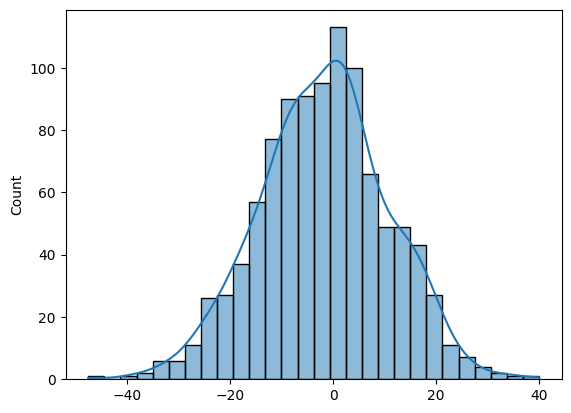

In [227]:
def visualise_distribution(model):
    '''accepts the ng boost model'''
    Y_dist = ngb.pred_dist(X_test_fs)
    value = np.random.normal(loc=Y_dist.params['loc'][30],scale=Y_dist.params['scale'][30],size=1000)
    sns.histplot(value, kde=True)
visualise_distribution(ngb_unpickled)

In [279]:
path = '../data/pkl/ADV_OHE_TEAM_ALL'
def get_new_preproc_ngboost(path):
    df = pd.read_pickle(path)
    columns_drop = ['GAME_ID', 'TEAM_ID_h', 'TEAM_ABBREVIATION_h', 'TEAM_ID_a','TEAM_NAME_a','TEAM_ABBREVIATION_a', 'HOME_TEAM_h', 'HOME_TEAM_a', 'OFF_RATING_h','DEF_RATING_h','NET_RATING_h','AST_PCT_h','AST_TOV_h','OREB_PCT_h','DREB_PCT_h','REB_PCT_h','TM_TOV_PCT_h','EFG_PCT_h','TS_PCT_h','PACE_h','POSS_h','OFF_RATING_a','DEF_RATING_a','NET_RATING_a','AST_PCT_a','AST_TOV_a','OREB_PCT_a','DREB_PCT_a','REB_PCT_a','TM_TOV_PCT_a','EFG_PCT_a','TS_PCT_a','PACE_a','POSS_a']
    X = df.drop(columns_drop, axis=1)
    y = df['PLUS_MINUS']

    X.drop(['TEAM_NAME_h','GAME_DATE', 'PLUS_MINUS'], axis=1, inplace=True)
    importances_removed = ['POSS_Roll_median_h', 'OFF_RATING_Roll_std_a', 'PACE_Roll_mean_a', 'REB_PCT_Roll_std_h', 'AST_PCT_Roll_std_a', 'AST_TOV_Roll_mean_h', 'EFG_PCT_Roll_mean_a', 'OFF_RATING_Roll_median_a', 'TS_PCT_Roll_std_a', 'REB_PCT_Roll_mean_a', 'OFF_RATING_Roll_std_h', 'OFF_RATING_Roll_mean_a', 'OREB_PCT_Roll_mean_a', 'REB_PCT_Roll_median_a', 'TM_TOV_PCT_Roll_std_h', 'OREB_PCT_Roll_median_h', 'TS_PCT_Roll_std_h', 'EFG_PCT_Roll_std_h', 'DREB_PCT_Roll_std_h', 'AST_PCT_Roll_median_h', 'DEF_RATING_Roll_std_h', 'AST_PCT_Roll_mean_a', 'TM_TOV_PCT_Roll_mean_h', 'OREB_PCT_Roll_median_a', 'AST_TOV_Roll_median_h', 'POSS_Roll_median_a', 'DEF_RATING_Roll_median_h', 'DREB_PCT_Roll_median_h', 'EFG_PCT_Roll_std_a', 'PACE_Roll_median_a', 'DREB_PCT_Roll_mean_h', 'POSS_Roll_mean_h', 'TM_TOV_PCT_Roll_median_a', 'TM_TOV_PCT_Roll_median_h', 'PACE_Roll_median_h', 'DREB_PCT_Roll_mean_a', 'POSS_Roll_mean_a', 'TS_PCT_Roll_median_h', 'TM_TOV_PCT_Roll_std_a', 'POSS_Roll_std_a', 'DEF_RATING_Roll_median_a', 'EFG_PCT_Roll_median_h', 'OFF_RATING_Roll_median_h', 'EFG_PCT_Roll_median_a', 'TS_PCT_Roll_mean_a', 'OREB_PCT_Roll_std_h', 'NET_RATING_Roll_std_a', 'POSS_Roll_std_h', 'AST_PCT_Roll_mean_h', 'PACE_Roll_mean_h', 'OREB_PCT_Roll_std_a', 'DREB_PCT_Roll_std_a', 'REB_PCT_Roll_std_a', 'PACE_Roll_std_a', 'AST_PCT_Roll_median_a', 'REB_PCT_Roll_mean_h', 'REB_PCT_Roll_median_h']
    X_fs = X.drop(importances_removed, axis=1)
    return (X_fs, y)

In [280]:
X, y = get_new_preproc_ngboost(path)

In [282]:
X.columns

Index(['OFF_RATING_Roll_mean_h', 'DEF_RATING_Roll_mean_h',
       'NET_RATING_Roll_mean_h', 'OREB_PCT_Roll_mean_h', 'EFG_PCT_Roll_mean_h',
       'TS_PCT_Roll_mean_h', 'NET_RATING_Roll_median_h',
       'NET_RATING_Roll_std_h', 'AST_PCT_Roll_std_h', 'AST_TOV_Roll_std_h',
       'PACE_Roll_std_h', 'DEF_RATING_Roll_mean_a', 'NET_RATING_Roll_mean_a',
       'AST_TOV_Roll_mean_a', 'TM_TOV_PCT_Roll_mean_a',
       'NET_RATING_Roll_median_a', 'AST_TOV_Roll_median_a',
       'DREB_PCT_Roll_median_a', 'TS_PCT_Roll_median_a',
       'DEF_RATING_Roll_std_a', 'AST_TOV_Roll_std_a', 'ATL_h', 'BKN_h',
       'BOS_h', 'CHA_h', 'CHI_h', 'CLE_h', 'DAL_h', 'DEN_h', 'DET_h', 'GSW_h',
       'HOU_h', 'IND_h', 'LAC_h', 'LAL_h', 'MEM_h', 'MIA_h', 'MIL_h', 'MIN_h',
       'NOP_h', 'NYK_h', 'OKC_h', 'ORL_h', 'PHI_h', 'PHX_h', 'POR_h', 'SAC_h',
       'SAS_h', 'TOR_h', 'UTA_h', 'WAS_h', 'ATL_a', 'BKN_a', 'BOS_a', 'CHA_a',
       'CHI_a', 'CLE_a', 'DAL_a', 'DEN_a', 'DET_a', 'GSW_a', 'HOU_a', 'IND_a',
       'LA

In [322]:
def get_mean_std_normal_distribution(model, X_test):
    '''returns the normal distribution mean and standard deviation of games by their index
    from loc and scale respectively given the NGboost model. 
    The target is basically the PLUS_MINUS series. 
    '''
    Y_dist = model.pred_dist(X_test)

    mean = Y_dist.params['loc']
    std = Y_dist.params['scale']
    
    return (mean, std)

def get_all_range_distribution_prediction(model, X_test, y_test):
    '''returns the probability over the range of values.
    defaults to the right side of the distribution. Over large data and
    returns a DataFrame. X_test can be the new data, y_test can also be the sbr's
    actual metrics'''
    dist_prob = []
    means, stdevs = get_mean_std_normal_distribution(model, X_test)
    
    #loops over different games
    for i in range(y_test.shape[0]):
        mean = means[i]
        std = stdevs[i]
        if y_test[i] > 0:
            dist_prob.append(quad(normal_distribution_function, i, max(y_test), args=(mean, std))[0])
        elif y_test[i] < 0:
            dist_prob.append(quad(normal_distribution_function, min(y_test), i, args=(mean, std))[0])
    return dist_prob

In [329]:
list_prob = get_all_range_distribution_prediction(ngb_unpickled, X_test_fs, y_test)

In [328]:
def get_mean_std_normal_distribution(model, X_test):
    '''returns the normal distribution mean and standard deviation of games by their index
    from loc and scale respectively given the NGboost model. 
    The target is basically the PLUS_MINUS series. 
    '''
    Y_dist = model.pred_dist(X_test)

    mean = Y_dist.params['loc']
    std = Y_dist.params['scale']
    
    return (mean, std)
get_mean_std_normal_distribution(ngb_unpickled, X_test_fs)

(array([-5.00071733, -1.99202308,  0.55485605, ..., -2.24188287,
        -4.51696216, -3.44031592]),
 array([12.33544461, 12.82273176, 11.35376041, ..., 12.17488528,
        11.69197756, 12.48913118]))

In [332]:
list_prob

[0.6563728201472074,
 0.4076259105684803,
 0.5505794202841807,
 0.5672422151347155,
 0.5165978979822825,
 0.43838942686644783,
 0.40631560580977377,
 0.24095402360019616,
 0.6916645385513849,
 0.6907642906296789,
 0.5700567228630774,
 0.5191878909934895,
 0.7419000395333106,
 0.09819055859453492,
 0.30265246447400296,
 0.8621165709875522,
 0.7985641662310069,
 0.23208879636469865,
 0.1719923810986753,
 0.13939053748038926,
 0.15276740611679587,
 0.9291105718523707,
 0.9904378298369467,
 0.8877015329753422,
 0.11833308220460474,
 0.9356324291677591,
 0.02821925039315978,
 0.005602496754233216,
 0.017306171388527712,
 0.02311240039837044,
 0.98136643424789,
 0.9905198726977658,
 0.07550616428477229,
 0.9909331786483713,
 0.01861142517379842,
 0.9956334729725929,
 0.002627080480571737,
 0.9974312819200715,
 0.9957468377694136,
 0.9753066939477399,
 0.003167127080349113,
 0.9846130538279954,
 0.9970823263874898,
 0.9998966792342852,
 0.00016647549790203798,
 0.996809099841051,
 -4.36510908

In [312]:
dist_prob = []
dist_prob.append(quad(normal_distribution_function, min(target), i, args=(mean, std)))

In [313]:
dist_prob

[(0.7286228833763986, 8.089339002716805e-15)]

In [336]:
loc, scale = get_mean_std_normal_distribution(ngb_unpickled, X_test_fs)

In [339]:
max(y_test)

45.0